In [24]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
paris = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/paris_0320.csv')
berlin = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/berlin_0320.csv')
madrid = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/madrid_0320.csv')
lisbon = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/lisbon_0320.csv')
rome = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/rome_0320.csv')
bud = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/budapest_0320.csv')
athens = pd.read_csv('dep&ret_flights/dep&ret_flights_0320/athens_0320.csv')

In [4]:
# List of dataframes
dfs = [paris, berlin, madrid, lisbon, rome, bud, athens]

# Columns to convert to datetime
columns_to_convert = ['depFlight_departure', 'depFlight_arrival', 'retFlight_departure', 'retFlight_arrival']

# Convert columns to datetime
for df in dfs:
    for column in columns_to_convert:
        df[column] = pd.to_datetime(df[column])
# Extract the month from the departure date
for df in dfs:
    df['departure_month'] = df['depFlight_departure'].dt.month

## First, we check the data distribution

In [27]:
!pip install --upgrade pandas seaborn


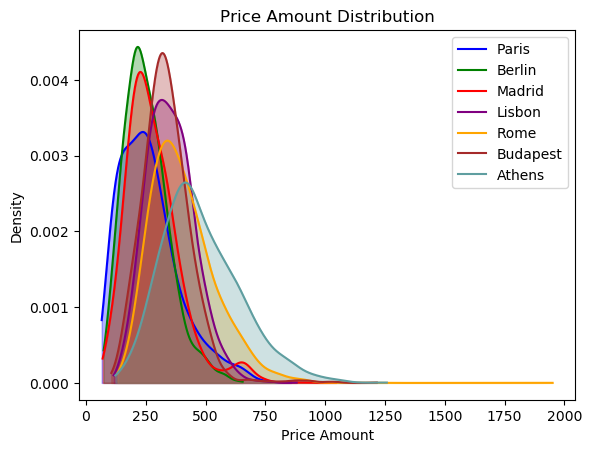

In [54]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

city_dfs = {
    'Paris': paris, 
    'Berlin': berlin, 
    'Madrid': madrid, 
    'Lisbon': lisbon, 
    'Rome': rome, 
    'Budapest': bud, 
    'Athens': athens
}

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'CadetBlue']

for city, (df, color) in zip(city_dfs.keys(), zip(city_dfs.values(), colors)):
    density = gaussian_kde(df['price_amount'])
    xs = np.linspace(df['price_amount'].min(), df['price_amount'].max(), 1000)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    plt.plot(xs, density(xs), color=color, label=city)
    plt.fill_between(xs, 0, density(xs), color=color, alpha=0.3)

plt.title('Price Amount Distribution')
plt.xlabel('Price Amount')
plt.ylabel('Density')
plt.legend()
plt.show()



In [53]:
import pandas as pd
from scipy.stats import wasserstein_distance

city_dfs = {
    'Paris': paris, 
    'Berlin': berlin, 
    'Madrid': madrid, 
    'Lisbon': lisbon, 
    'Rome': rome, 
    'Budapest': bud, 
    'Athens': athens
}

n = len(city_dfs)
wasserstein_matrix = [[0] * n for _ in range(n)]

for i in range(n):
    for j in range(i+1, n):
        dist1 = city_dfs[list(city_dfs.keys())[i]]['price_amount']
        dist2 = city_dfs[list(city_dfs.keys())[j]]['price_amount']
        wasserstein_dist = wasserstein_distance(dist1, dist2)
        wasserstein_matrix[i][j] = wasserstein_dist
        wasserstein_matrix[j][i] = wasserstein_dist

# Create a DataFrame for the Wasserstein matrix
df_wasserstein = pd.DataFrame(wasserstein_matrix, index=city_dfs.keys(), columns=city_dfs.keys())

# Print the Wasserstein matrix as a table
print(df_wasserstein)


               Paris      Berlin      Madrid      Lisbon        Rome   
Paris       0.000000   24.191564   21.731911   91.126188  140.488443  \
Berlin     24.191564    0.000000   28.413657  100.358074  151.525746   
Madrid     21.731911   28.413657    0.000000   76.023007  123.157043   
Lisbon     91.126188  100.358074   76.023007    0.000000   51.167672   
Rome      140.488443  151.525746  123.157043   51.167672    0.000000   
Budapest   76.407623   83.790173   59.981778   20.348938   68.130463   
Athens    217.364016  228.401320  200.032617  128.044874   77.119601   

            Budapest      Athens  
Paris      76.407623  217.364016  
Berlin     83.790173  228.401320  
Madrid     59.981778  200.032617  
Lisbon     20.348938  128.044874  
Rome       68.130463   77.119601  
Budapest    0.000000  144.611146  
Athens    144.611146    0.000000  


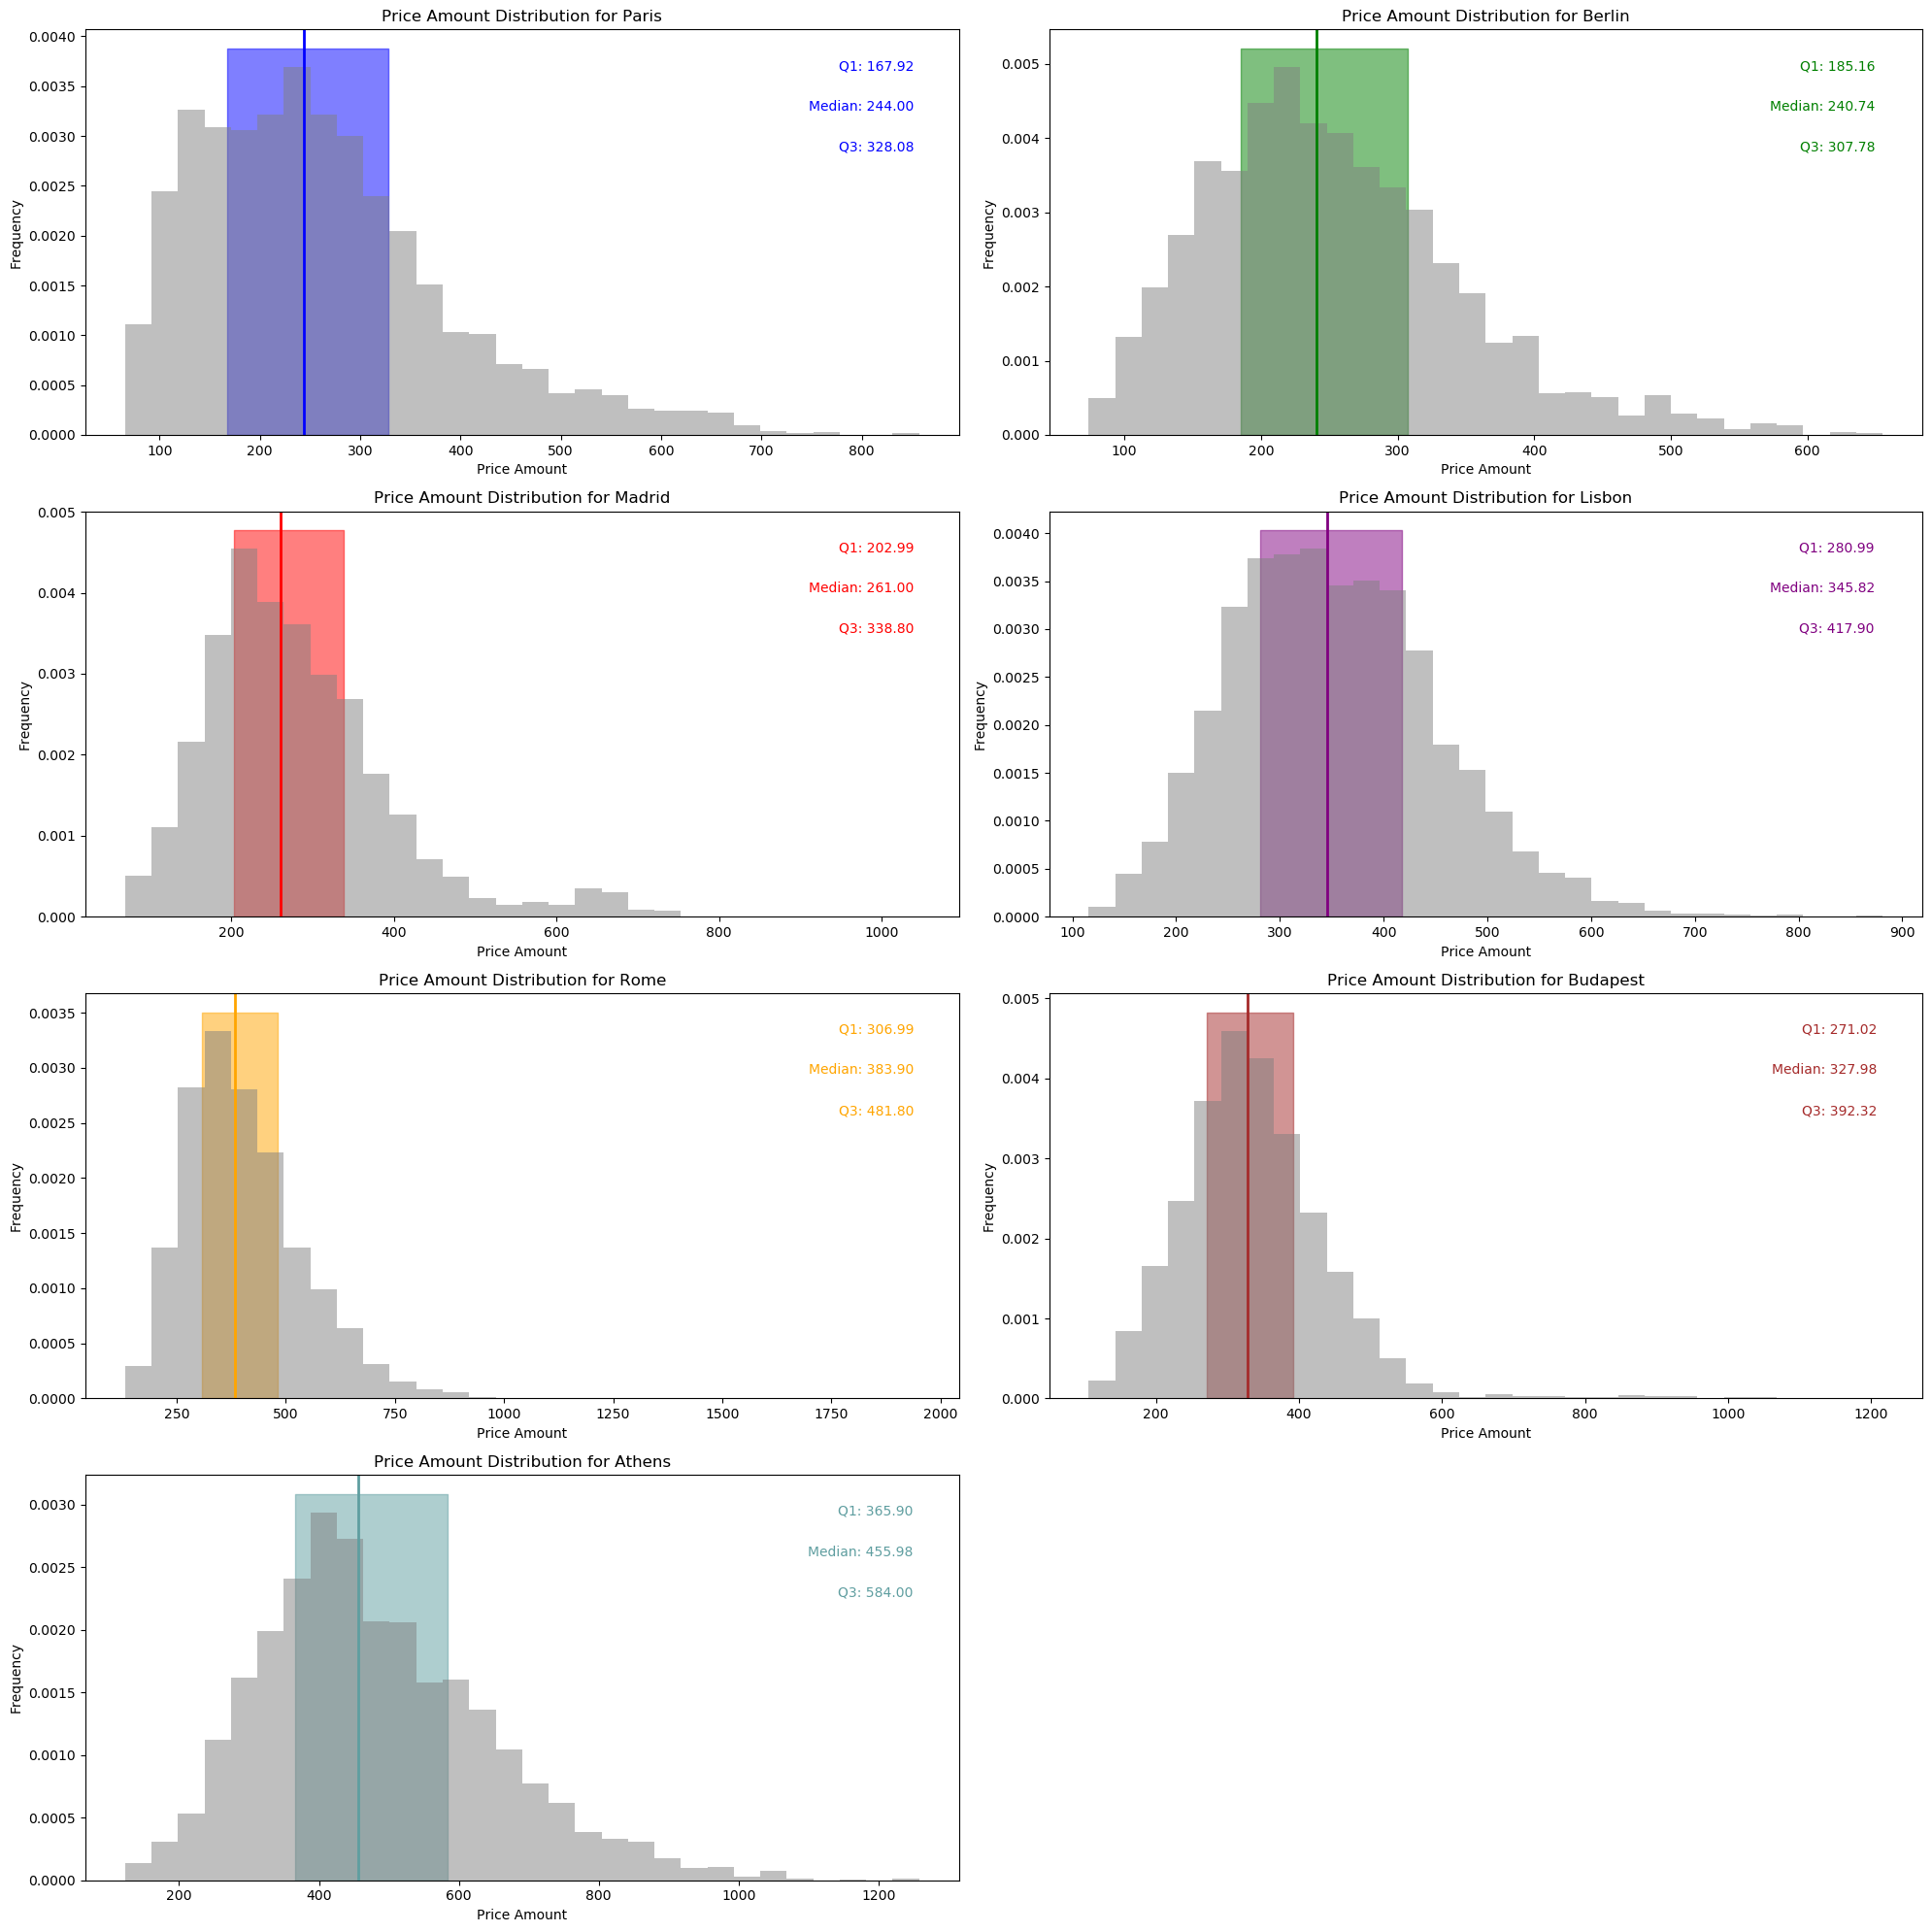

In [43]:
import numpy as np

city_dfs = {'Paris': paris, 'Berlin': berlin, 'Madrid': madrid, 'Lisbon': lisbon, 'Rome': rome, 'Budapest': bud, 'Athens': athens}
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'CadetBlue']

n = len(city_dfs)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*ncols, 5*nrows))

for (city, df), color, ax in zip(city_dfs.items(), colors, axs.ravel()):
    ax.hist(df['price_amount'], color='gray', bins=30, density=True, alpha=0.5)

    Q1 = df['price_amount'].quantile(0.25)
    median = df['price_amount'].median()
    Q3 = df['price_amount'].quantile(0.75)

    ax.fill_betweenx([0, ax.get_ylim()[1]], Q1, Q3, color=color, alpha=0.5)
    ax.axvline(median, color=color, linestyle='-', linewidth=2)

    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.9, 'Q1: {:.2f}'.format(Q1), ha='right', color=color)
    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.8, 'Median: {:.2f}'.format(median), ha='right', color=color)
    ax.text(ax.get_xlim()[1]*0.95, ax.get_ylim()[1]*0.7, 'Q3: {:.2f}'.format(Q3), ha='right', color=color)

    ax.set_title('Price Amount Distribution for {}'.format(city))
    ax.set_xlabel('Price Amount')
    ax.set_ylabel('Frequency')

# Remove unused subplots
for ax in axs.ravel()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

files = ['athens_0320.csv', 'paris_0320.csv', 'madrid_0320.csv', 'lisbon_0320.csv', 'budapest_0320.csv', 'berlin_0320.csv', 'athens_0320.csv']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

for file, color in zip(files, colors):
    df = pd.read_csv(file)
    density = gaussian_kde(df['price_amount'])
    xs = np.linspace(df['price_amount'].min(), df['price_amount'].max(), 1000)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    plt.plot(xs, density(xs), color=color)

plt.title('Price Amount Distribution')
plt.xlabel('Price Amount')
plt.ylabel('Density')
plt.show()


In [5]:
def get_outliers(df, column, factor=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Drop duplicates based on 'id' column
    outliers = outliers.drop_duplicates(subset=['id'])

    return outliers

In [6]:
paris_out = get_outliers(paris,'price_amount')
berlin_out = get_outliers(berlin,'price_amount')
mad_out = get_outliers(madrid,'price_amount')
lis_out = get_outliers(lisbon,'price_amount')
rome_out = get_outliers(rome,'price_amount')
bud_out = get_outliers(bud,'price_amount')
athens_out = get_outliers(athens,'price_amount')

## Now, we carry out the outlier analysis by each city

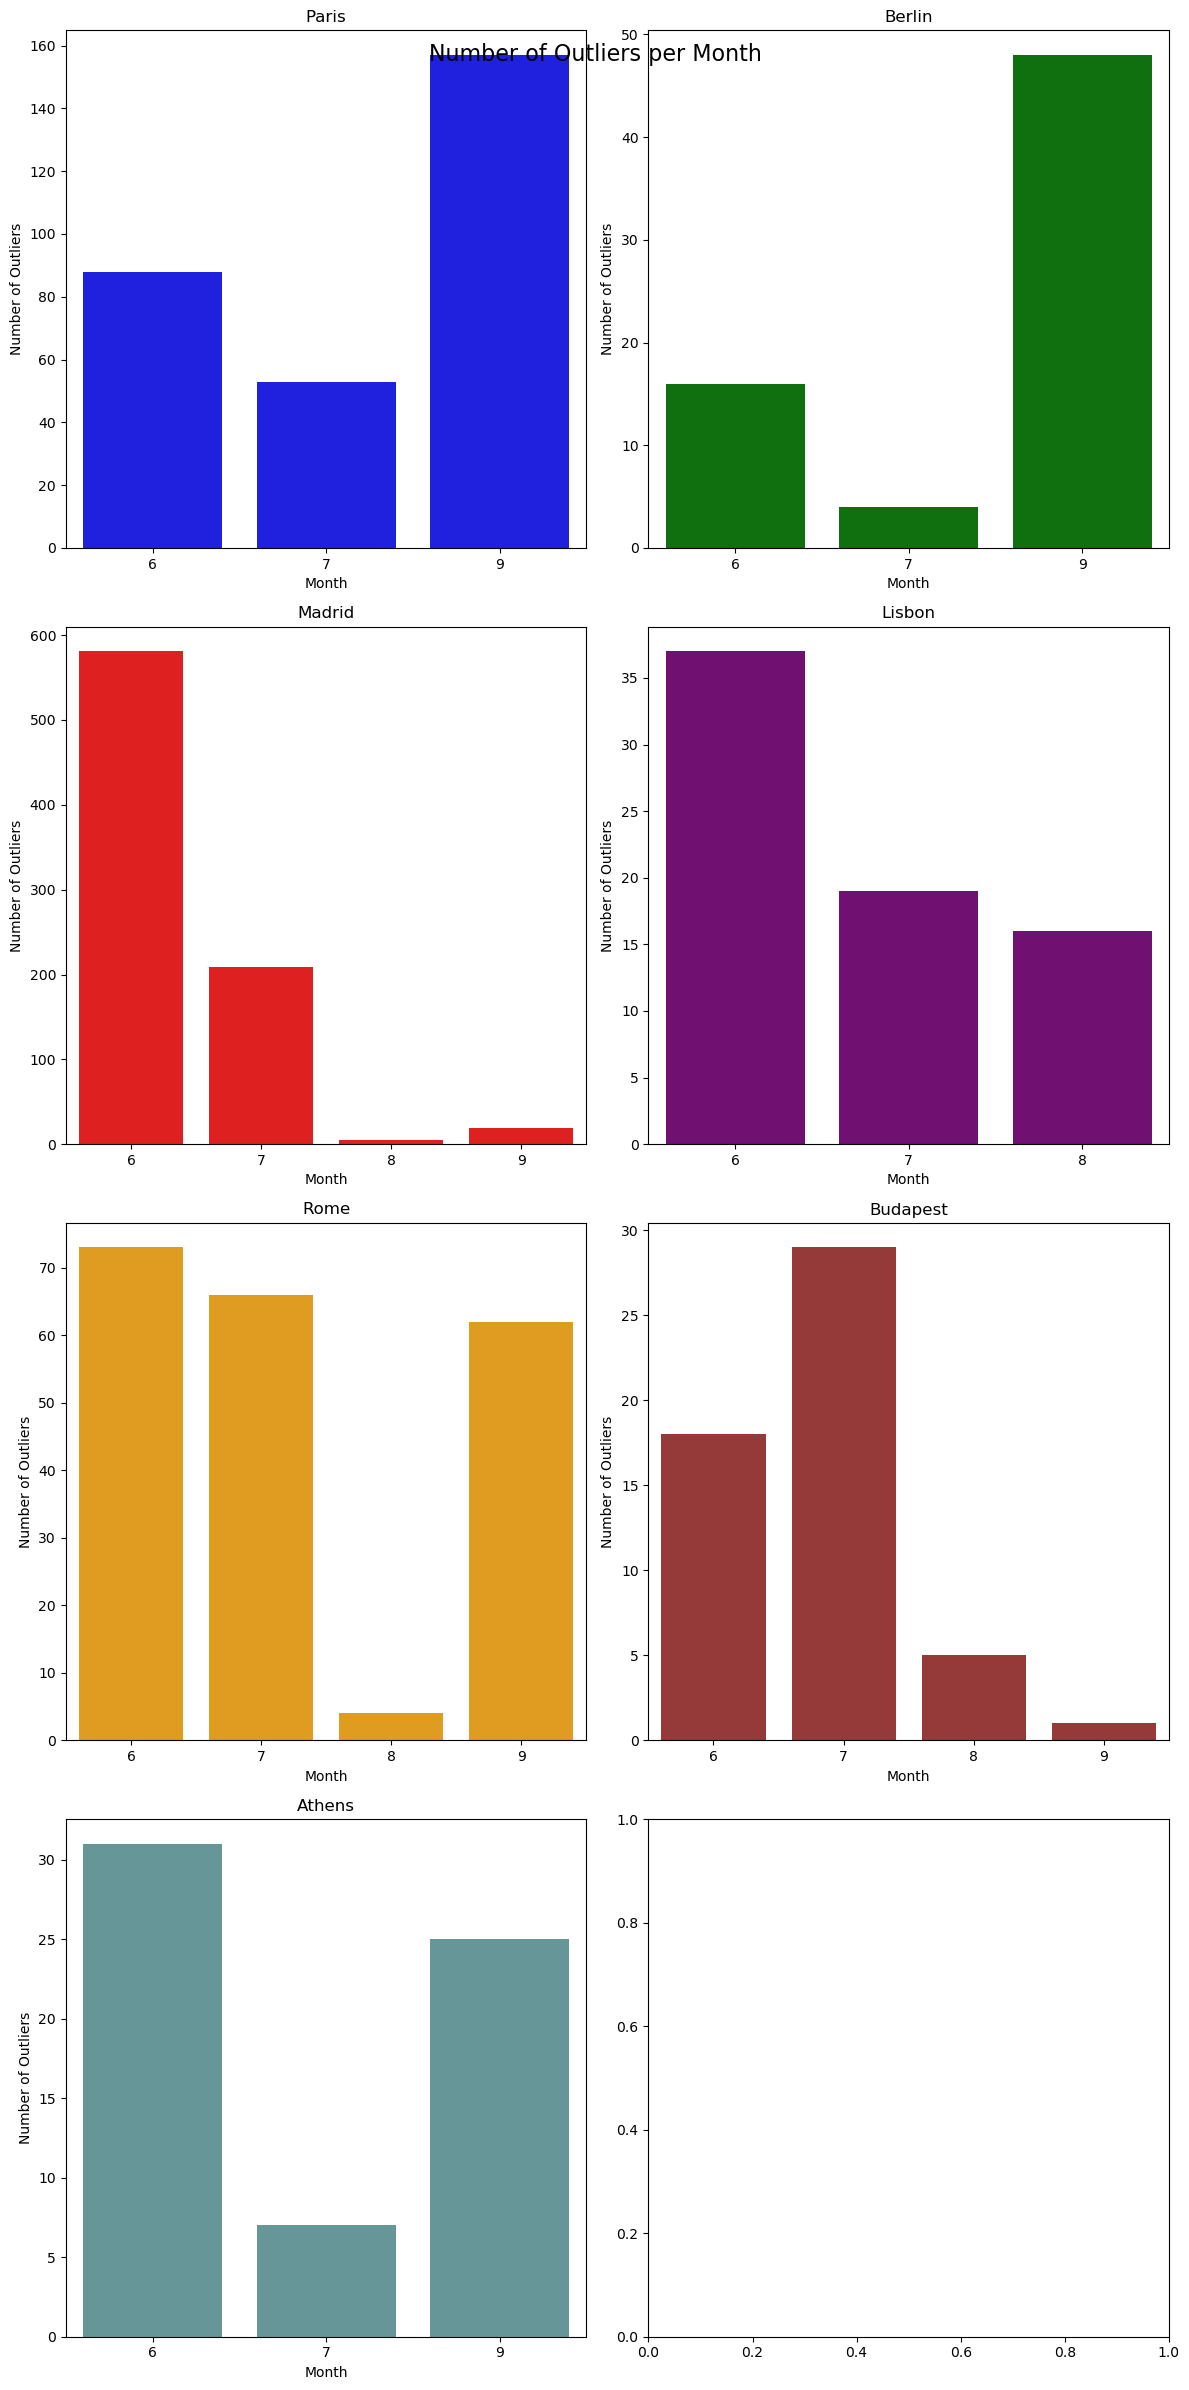

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataframes
dfs = [paris_out, berlin_out, mad_out, lis_out, rome_out, bud_out, athens_out]
df_names = ["Paris", "Berlin", "Madrid", "Lisbon", "Rome", "Budapest", "Athens"]

# Define a custom color palette
city_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'CadetBlue']

# Number of Outliers per Month
num_rows = (len(dfs) + 1) // 2  # Calculate the number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
fig.suptitle("Number of Outliers per Month", fontsize=16)

for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x='departure_month', data=df, color=city_colors[i], ax=ax)
    ax.set_title(f'{df_names[i]}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Outliers')

plt.tight_layout()
plt.savefig('outliers_month.png')
plt.show()



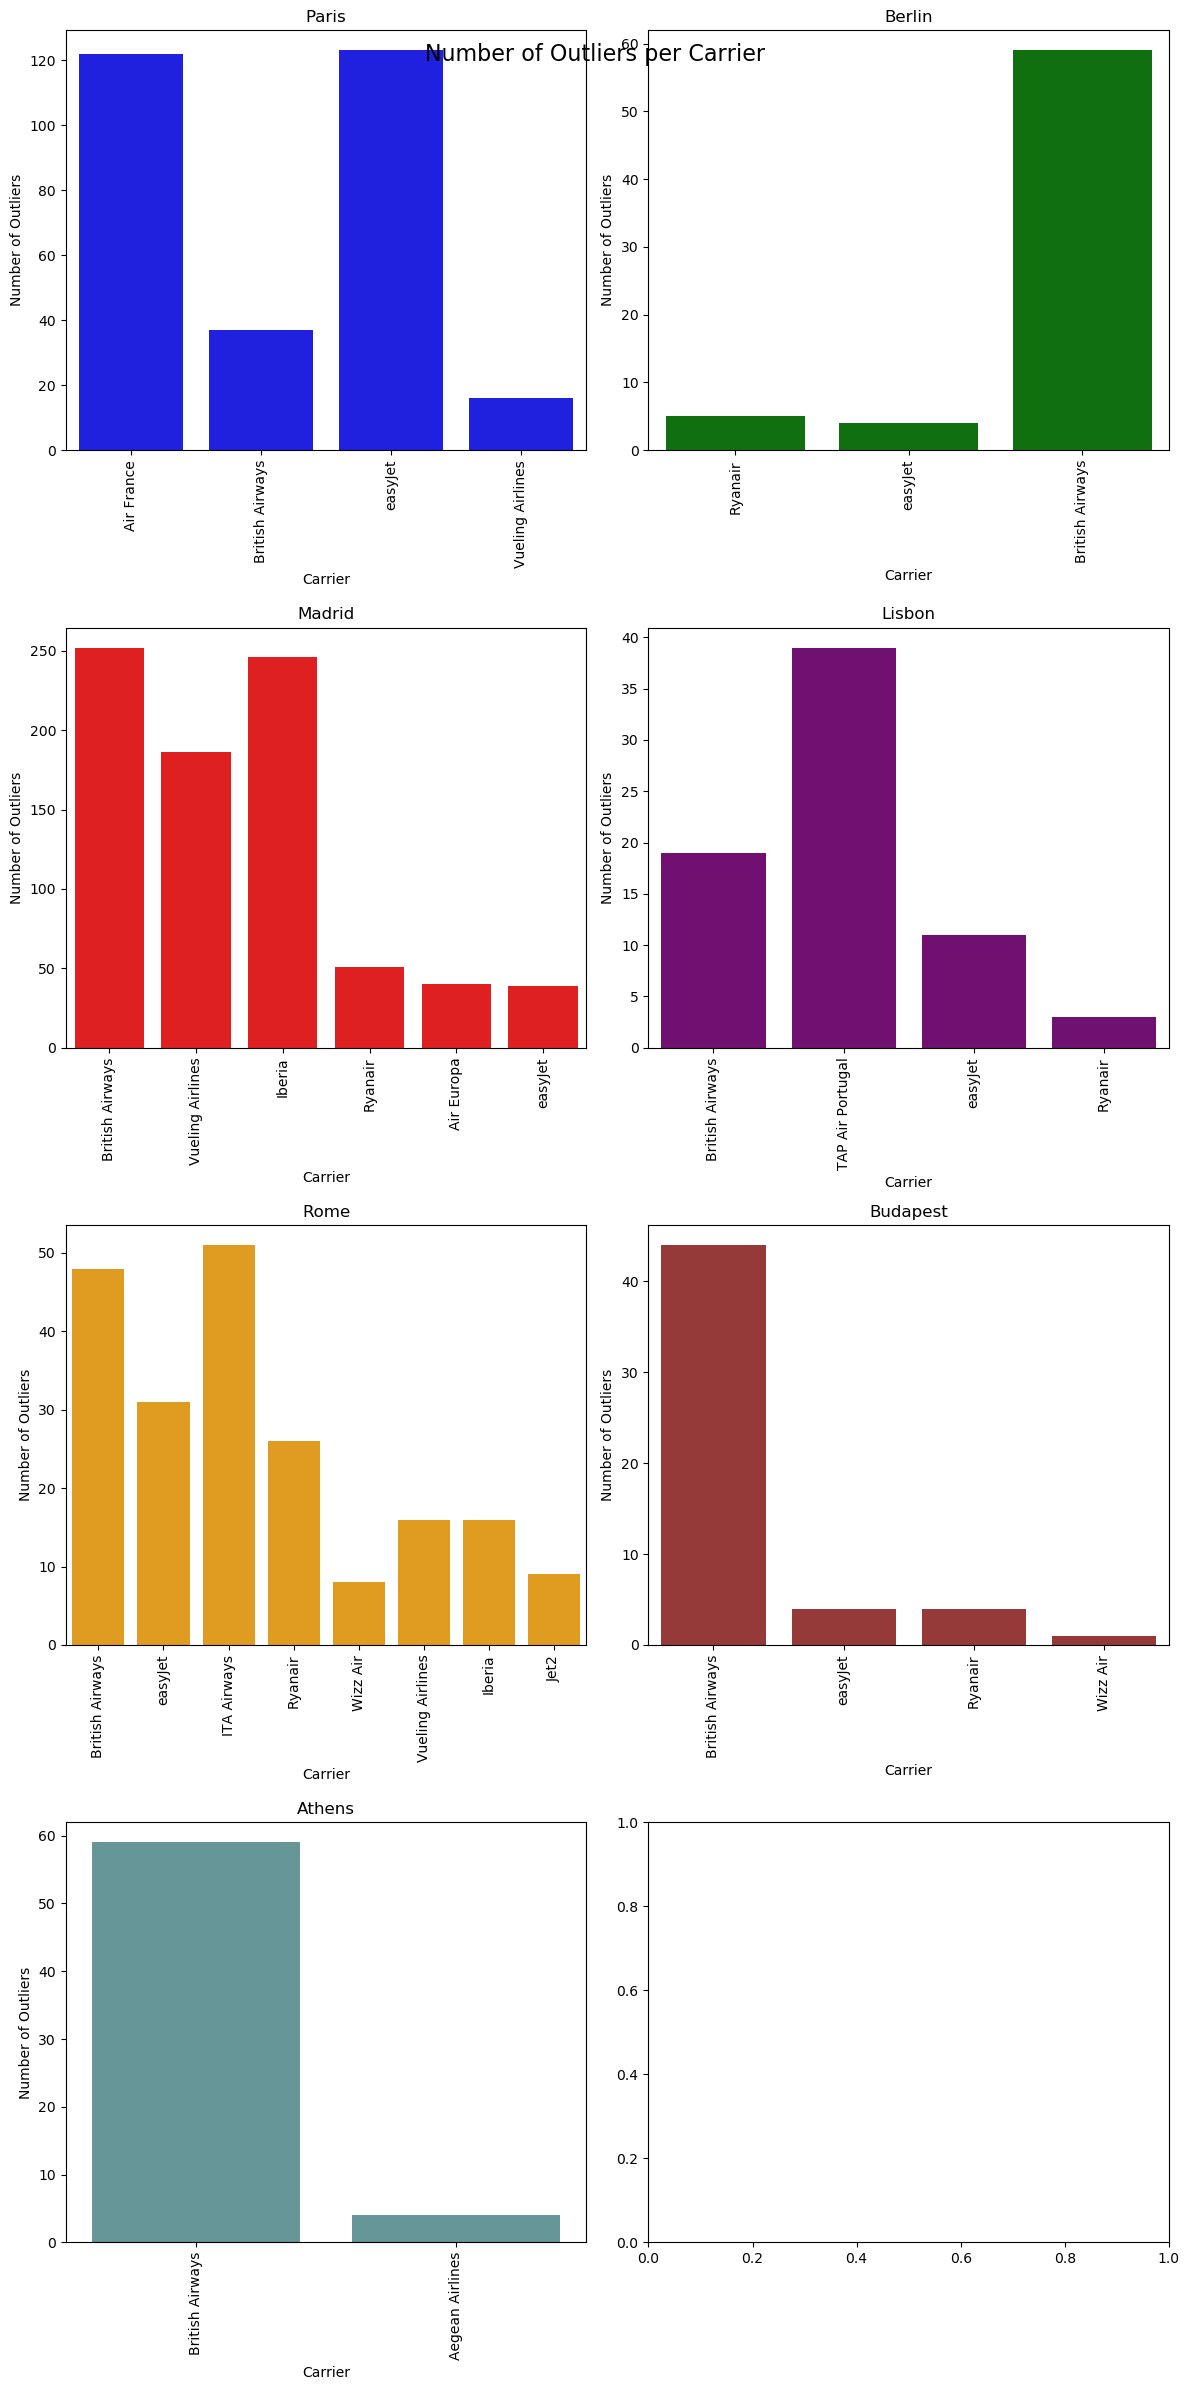

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataframes
dfs = [paris_out, berlin_out, mad_out, lis_out, rome_out, bud_out, athens_out]
df_names = ["Paris", "Berlin", "Madrid", "Lisbon", "Rome", "Budapest", "Athens"]

# Define a custom color palette
city_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'CadetBlue']

# Number of Outliers per Carrier
num_rows = (len(dfs) + 1) // 2  # Calculate the number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
fig.suptitle("Number of Outliers per Carrier", fontsize=16)

for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x='depFlight_name', data=df, color=city_colors[i], ax=ax)
    ax.set_title(f'{df_names[i]}')
    ax.set_xlabel('Carrier')
    ax.set_ylabel('Number of Outliers')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig('outliers_carrier.png')
plt.show()



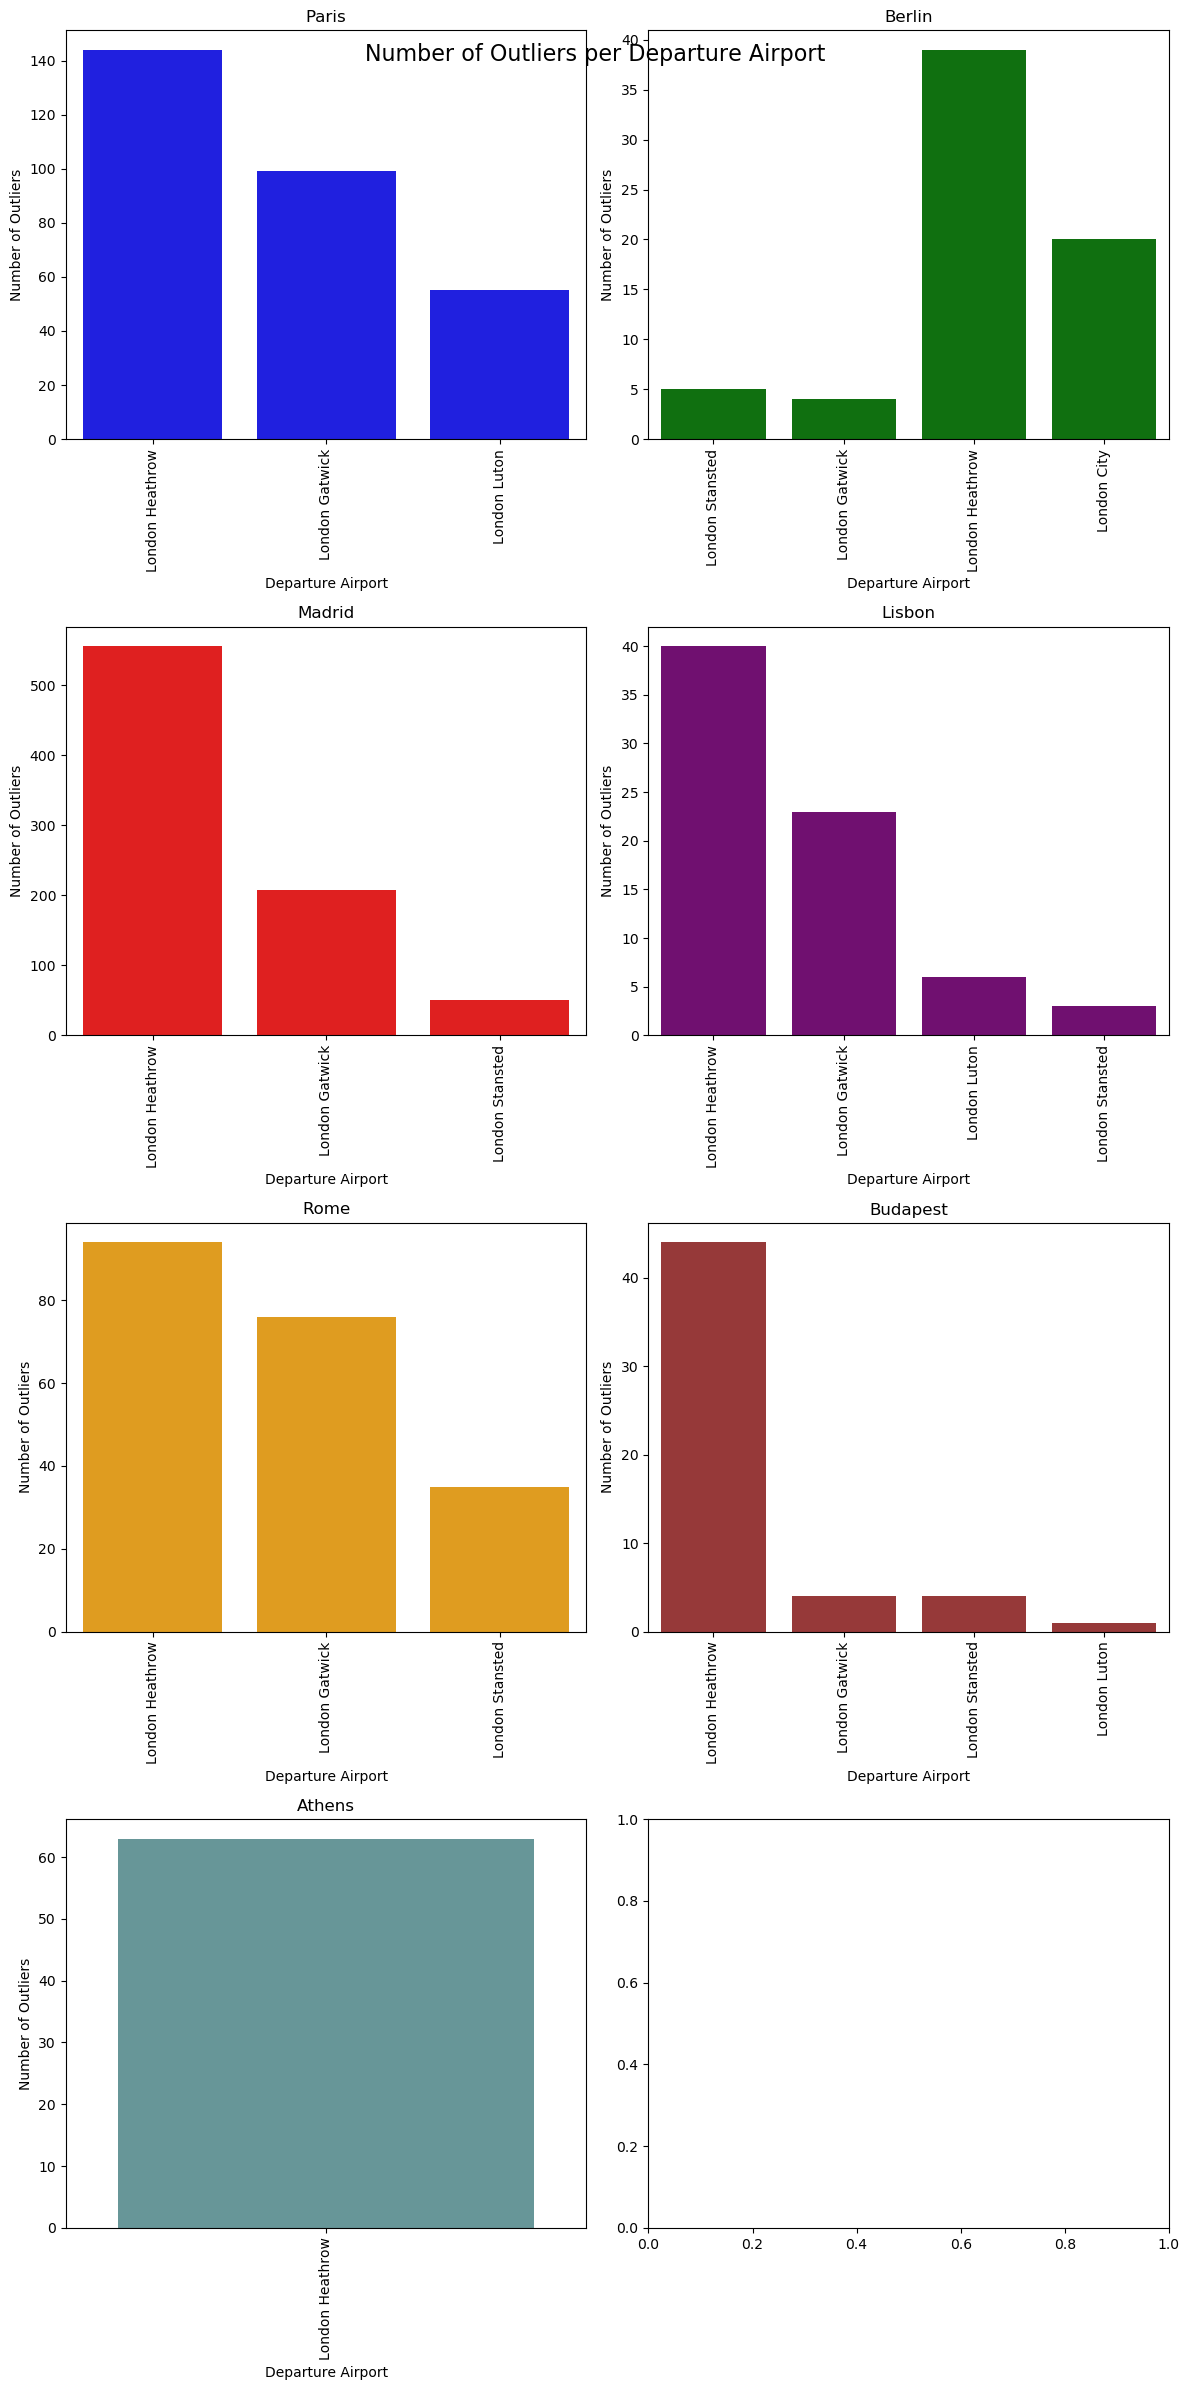

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of dataframes
dfs = [paris_out, berlin_out, mad_out, lis_out, rome_out, bud_out, athens_out]
df_names = ["Paris", "Berlin", "Madrid", "Lisbon", "Rome", "Budapest", "Athens"]

# Define a custom color palette
city_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'CadetBlue']

# Number of Outliers per Departure Airport
num_rows = (len(dfs) + 1) // 2  # Calculate the number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
fig.suptitle("Number of Outliers per Departure Airport", fontsize=16)

for i, df in enumerate(dfs):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x='depFlight_origin.name', data=df, color=city_colors[i], ax=ax)
    ax.set_title(f'{df_names[i]}')
    ax.set_xlabel('Departure Airport')
    ax.set_ylabel('Number of Outliers')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig('outliers_airport.png')
plt.show()


In [55]:
paris.columns

Index(['id', 'depFlight_id', 'depFlight_origin.name',
       'depFlight_origin.displayCode', 'depFlight_destination.name',
       'depFlight_destination.displayCode', 'depFlight_durationInMinutes',
       'depFlight_departure', 'depFlight_arrival', 'depFlight_name',
       'depFlight_flightNumber', 'retFlight_id', 'retFlight_origin.name',
       'retFlight_origin.displayCode', 'retFlight_destination.name',
       'retFlight_destination.displayCode', 'retFlight_durationInMinutes',
       'retFlight_departure', 'retFlight_arrival', 'retFlight_name',
       'retFlight_flightNumber', 'booking_agent', 'is_carrier',
       'rating_status', 'rating', 'rating_breakdown.reliable_prices',
       'rating_breakdown.clear_extra_fees',
       'rating_breakdown.customer_service', 'rating_breakdown.ease_of_booking',
       'rating_breakdown.other', 'price_amount', 'departure_month'],
      dtype='object')